## Import libraries & data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import Normalizer

In [2]:
file = 'hela'

In [3]:
data = pd.read_csv(file +".csv")

In [4]:
features = data.iloc[:,0:-1].apply(pd.to_numeric,errors='coerce')

In [5]:
features

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,79.44,367.58,134.26,340.10,55.84,128.98,116.06,146.24,225.37,71.78,250.85,97.70,125.74
1,227.68,377.99,143.78,909.55,69.86,111.05,328.55,452.36,848.00,448.88,845.08,105.52,164.28
2,147.91,267.28,208.66,186.35,88.21,65.66,169.68,195.88,384.15,73.11,315.63,122.91,156.95
3,291.95,173.69,155.30,357.10,62.56,154.09,122.71,185.44,297.12,111.28,397.26,127.79,159.28
4,317.60,170.73,176.52,507.94,96.17,280.72,189.48,306.04,574.34,225.78,716.71,129.45,214.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,228.90,201.98,117.21,170.08,65.21,241.28,225.36,104.44,116.36,92.24,134.75,118.60,144.20
6958,94.54,68.34,85.99,63.93,65.09,378.16,74.21,91.07,84.32,181.80,86.77,145.77,154.72
6959,443.76,157.66,104.52,71.13,159.14,101.55,62.88,76.72,88.64,90.18,93.01,126.55,177.13
6960,311.80,244.87,112.18,428.63,76.11,337.85,183.92,271.79,462.68,414.16,451.90,104.97,253.35


In [6]:
#sns.clustermap(features, z_score=0)

## Normalize data

In [7]:
array = features.to_numpy()
normalized_features = stats.zscore(array, axis = 1)

print(np.any(np.isnan(normalized_features)))
print(np.where(np.isnan(normalized_features)))

False
(array([], dtype=int64), array([], dtype=int64))


In [8]:
if np.any(np.isnan(normalized_features)):
    normalized_features = np.nan_to_num(normalized_features)

In [9]:
#normalized_features = Normalizer().fit_transform(features)
normalized_features = pd.DataFrame(normalized_features) 
normalized_features.columns = ['CTCF','DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 
normalized_features

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,-0.880280,2.097782,-0.313689,1.813763,-1.124197,-0.368261,-0.501795,-0.189870,0.627975,-0.959449,0.891323,-0.691554,-0.401748
1,-0.548842,-0.031433,-0.837648,1.798342,-1.092101,-0.950314,-0.201619,0.224569,1.586470,0.212590,1.576419,-0.969350,-0.767082
2,-0.390526,0.928204,0.280605,0.034137,-1.050058,-1.299177,-0.150024,0.139418,2.219317,-1.216874,1.462347,-0.666712,-0.290658
3,0.937091,-0.263683,-0.450409,1.598603,-1.392061,-0.462695,-0.781318,-0.144377,0.989585,-0.897374,2.006374,-0.729737,-0.409998
4,0.095499,-0.721055,-0.688864,1.153732,-1.135586,-0.109543,-0.616810,0.031228,1.522896,-0.414993,2.314431,-0.950559,-0.480375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,1.418478,0.929447,-0.610492,0.349949,-1.555129,1.643375,1.354170,-0.842473,-0.625934,-1.064100,-0.291859,-0.585242,-0.120190
6958,-0.322721,-0.640691,-0.426486,-0.694211,-0.680133,3.119358,-0.569451,-0.364834,-0.446754,0.736287,-0.417020,0.299018,0.407637
6959,3.229931,0.238633,-0.316968,-0.666075,0.254107,-0.348021,-0.752332,-0.607629,-0.483001,-0.466899,-0.437310,-0.086635,0.442200
6960,0.236602,-0.279105,-1.301504,1.136797,-1.579430,0.437322,-0.748735,-0.071682,1.399158,1.025304,1.316097,-1.357059,-0.213765


## Overview

In [10]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(features)

array([[1.        , 0.89434936, 0.91821923, ..., 0.62471511, 0.87702809,
        0.85346755],
       [0.89434936, 1.        , 0.89892452, ..., 0.53339423, 0.9284121 ,
        0.96789323],
       [0.91821923, 0.89892452, 1.        , ..., 0.68887734, 0.88918288,
        0.82933718],
       ...,
       [0.62471511, 0.53339423, 0.68887734, ..., 1.        , 0.71625254,
        0.49414605],
       [0.87702809, 0.9284121 , 0.88918288, ..., 0.71625254, 1.        ,
        0.93533774],
       [0.85346755, 0.96789323, 0.82933718, ..., 0.49414605, 0.93533774,
        1.        ]])

## Elbow

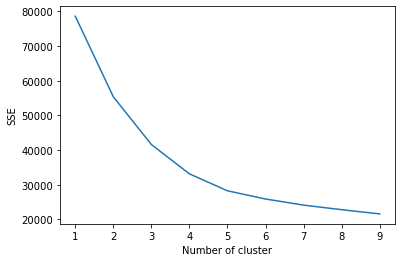

In [11]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_features)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Silhouette coefficient

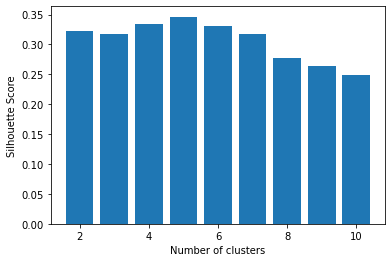

In [12]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [13]:
n_cluster = []
for n in range(2, 11):
    n_cluster.append(n)

sil = pd.DataFrame({'n_cluster':n_cluster, 'silhouette_scores':silhouette_scores})

In [14]:
ncluster = sil['n_cluster'].iloc[sil['silhouette_scores'].argmax()]

## Overview of K-Mean clusters

In [15]:
kmeans = KMeans(
    init="random",
    n_clusters=ncluster,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [16]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=5, random_state=12)

In [17]:
# Inertia
kmeans.inertia_

28239.590009645563

In [18]:
# Clusters' center
kmeans.cluster_centers_

array([[ 0.30257142,  0.05300023,  0.59540781, -1.28472991,  1.72925517,
         0.08484149, -0.7333826 , -0.50744085, -0.67619323, -0.70531732,
        -0.68015279,  0.90415572,  0.91798487],
       [-0.28327752,  0.35756615, -0.57803971,  0.95748407, -1.20787462,
        -0.34545053, -0.52165174,  0.32072155,  1.39225504,  0.31410219,
         1.26430833, -1.02949125, -0.64065194],
       [ 0.18866486,  0.17423443, -0.40016907, -0.65573678, -0.72408039,
         2.51690024, -0.49559025, -0.54424664, -0.63829524,  0.50627149,
        -0.46440311, -0.08452657,  0.62097703],
       [ 2.6551216 ,  0.40428164,  0.19512296, -0.90127688,  0.05532288,
        -0.14948238, -0.47455141, -0.42649541, -0.45687327, -0.73724662,
        -0.40504572, -0.02881527,  0.26993788],
       [ 0.5205411 ,  2.37598161,  0.22235476, -0.53331351, -0.62036605,
         0.06703122,  0.2428735 , -0.26737958, -0.60643214, -0.75539962,
        -0.57300904, -0.06487324, -0.008009  ]])

In [19]:
# Number of iteration
kmeans.n_iter_

14

## Visualization

In [20]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((normalized_features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

In [21]:
labeled.sort_values('labels')

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,labels
1221,0.099631,-0.061678,0.158777,-1.293645,2.575824,-0.512696,-0.881125,-0.431182,-0.299554,-0.607976,-0.852735,0.946823,1.159535,0
4166,-0.263731,0.889272,1.050994,-1.159817,-0.539761,0.761365,-0.627238,-0.748161,-1.046979,-0.170373,-0.908413,2.405782,0.357060,0
1503,-0.221249,0.417291,1.009552,-1.503937,1.455969,-0.138510,-1.224868,-0.283887,-0.966367,-0.625127,-0.633074,1.785522,0.928683,0
4169,0.321002,1.148316,0.710589,-1.918868,1.437842,-0.358799,0.054858,-0.635946,-0.684430,-0.742541,-1.330189,1.032437,0.965729,0
4173,-0.551592,-0.336361,0.069004,-1.064572,1.948283,1.092682,-0.812075,-0.238632,-1.087008,-0.548930,-0.863411,0.627236,1.765375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,-0.626966,2.183582,1.196160,-1.082747,-0.422997,1.065847,-0.462343,-0.371690,-1.018850,-0.682994,-1.089043,0.749822,0.562221,4
5912,-0.457182,2.577223,1.063313,-1.264183,-0.090064,0.867407,-0.230655,-0.521057,-0.941514,-0.532252,-0.963904,0.485802,0.007066,4
1168,1.075090,1.994799,0.820130,-1.404567,1.023679,0.045386,-0.393695,-0.886577,-0.911087,-1.264384,-0.745497,0.455474,0.191249,4
4265,-0.124920,2.727570,0.652309,-0.984142,-0.661167,0.797670,-0.161260,-0.383391,-1.020936,-0.904874,-0.737482,0.699324,0.101299,4


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


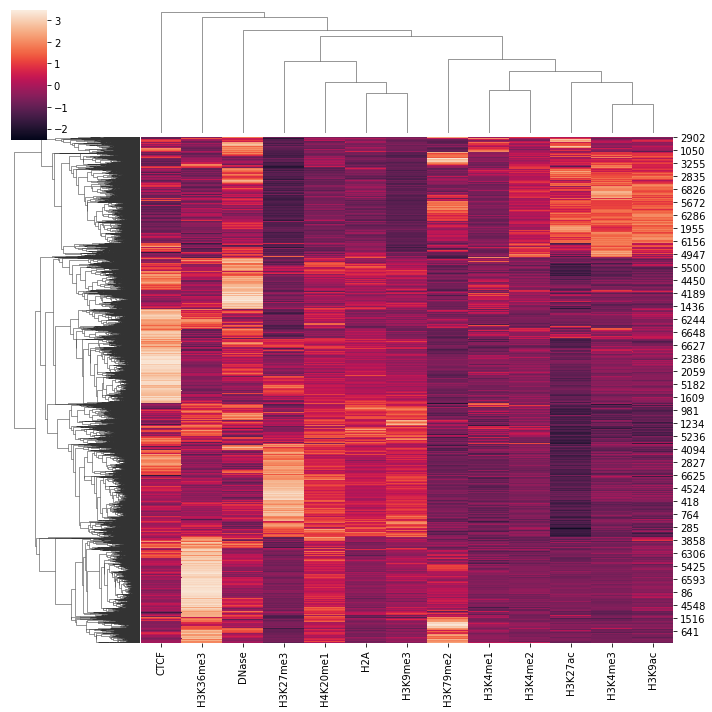

In [22]:
sns.clustermap(labeled.sort_values('labels').iloc[:,0:-1])

## Save data

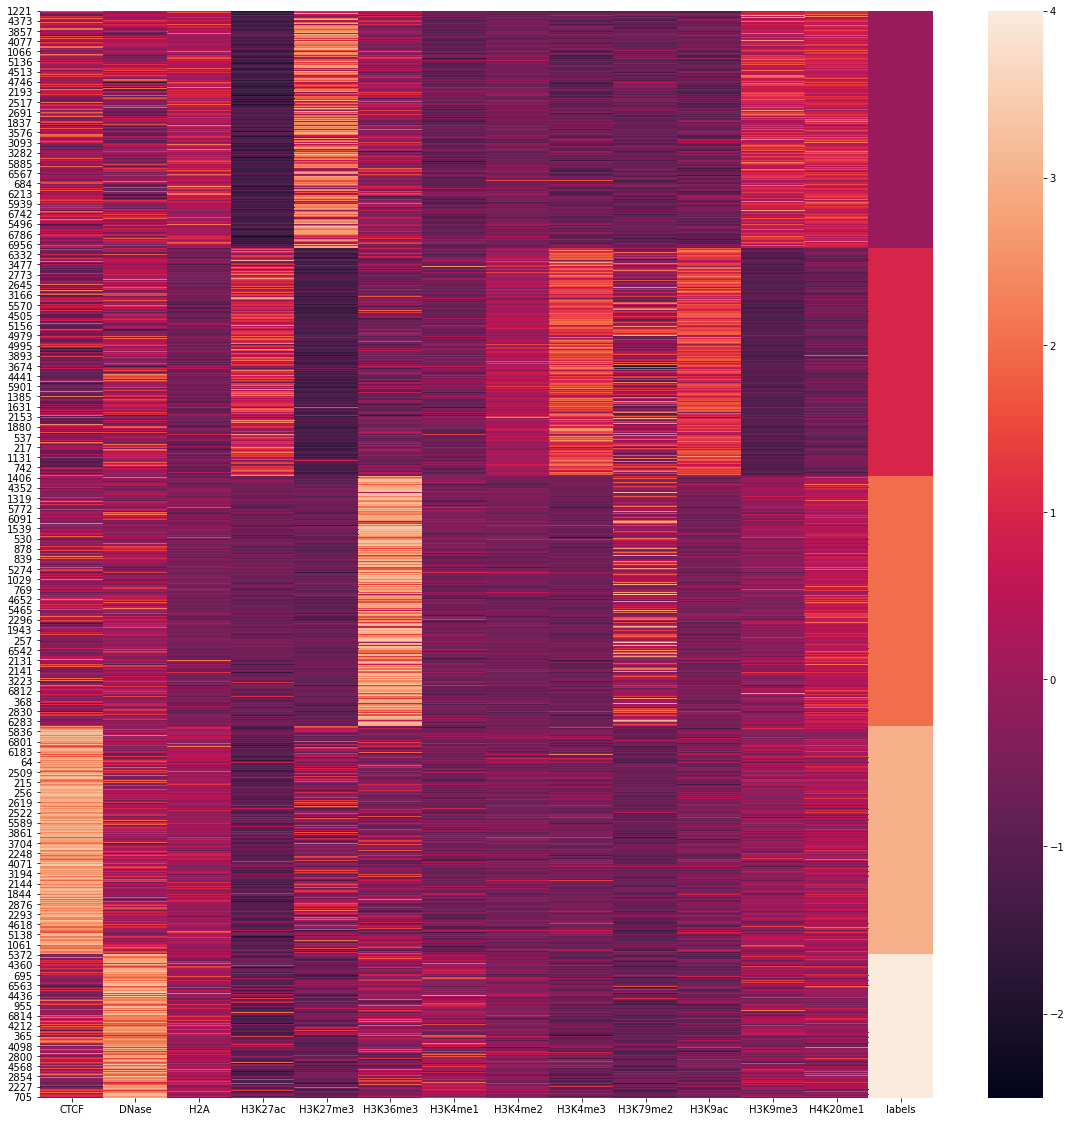

In [24]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(labeled.sort_values('labels'))
plt.savefig(file +".png")

In [25]:
file_labeled = pd.concat((data,labels),axis=1)
file_labeled = file_labeled.rename({0:'labels'},axis=1)
file_labeled.to_csv(file+'_labeled.csv')

## More Visualization

In [26]:
dat = pd.melt(labeled,id_vars=['labels'],value_vars=['CTCF','DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'],var_name='features')

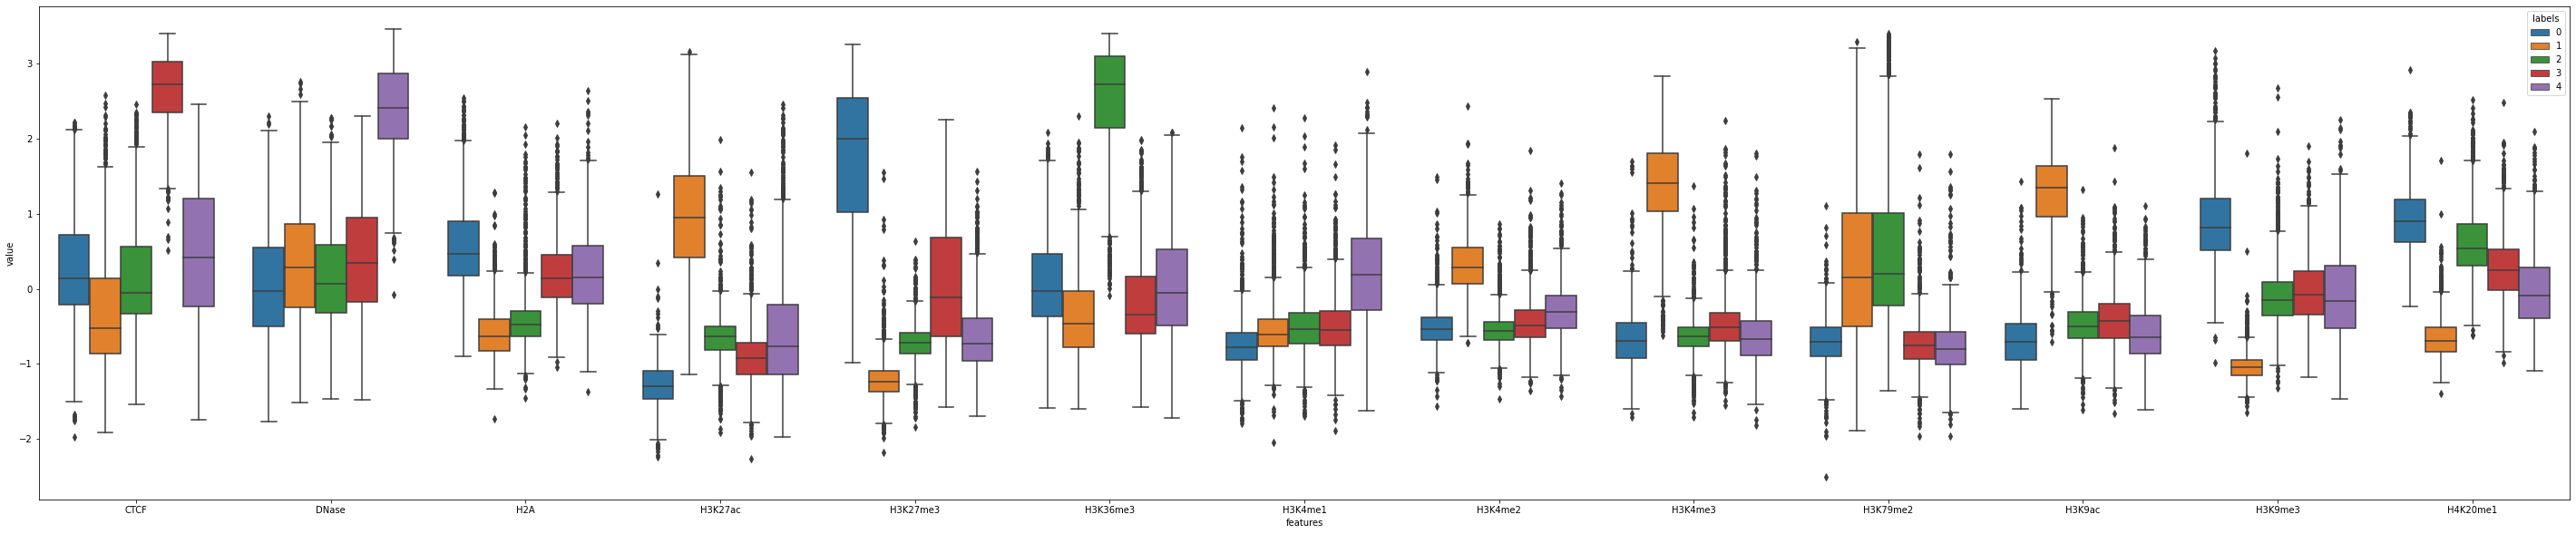

In [27]:
fig, ax = plt.subplots(figsize=(50,10)) 
sns.boxplot(x='features', y='value', data=dat,hue='labels')

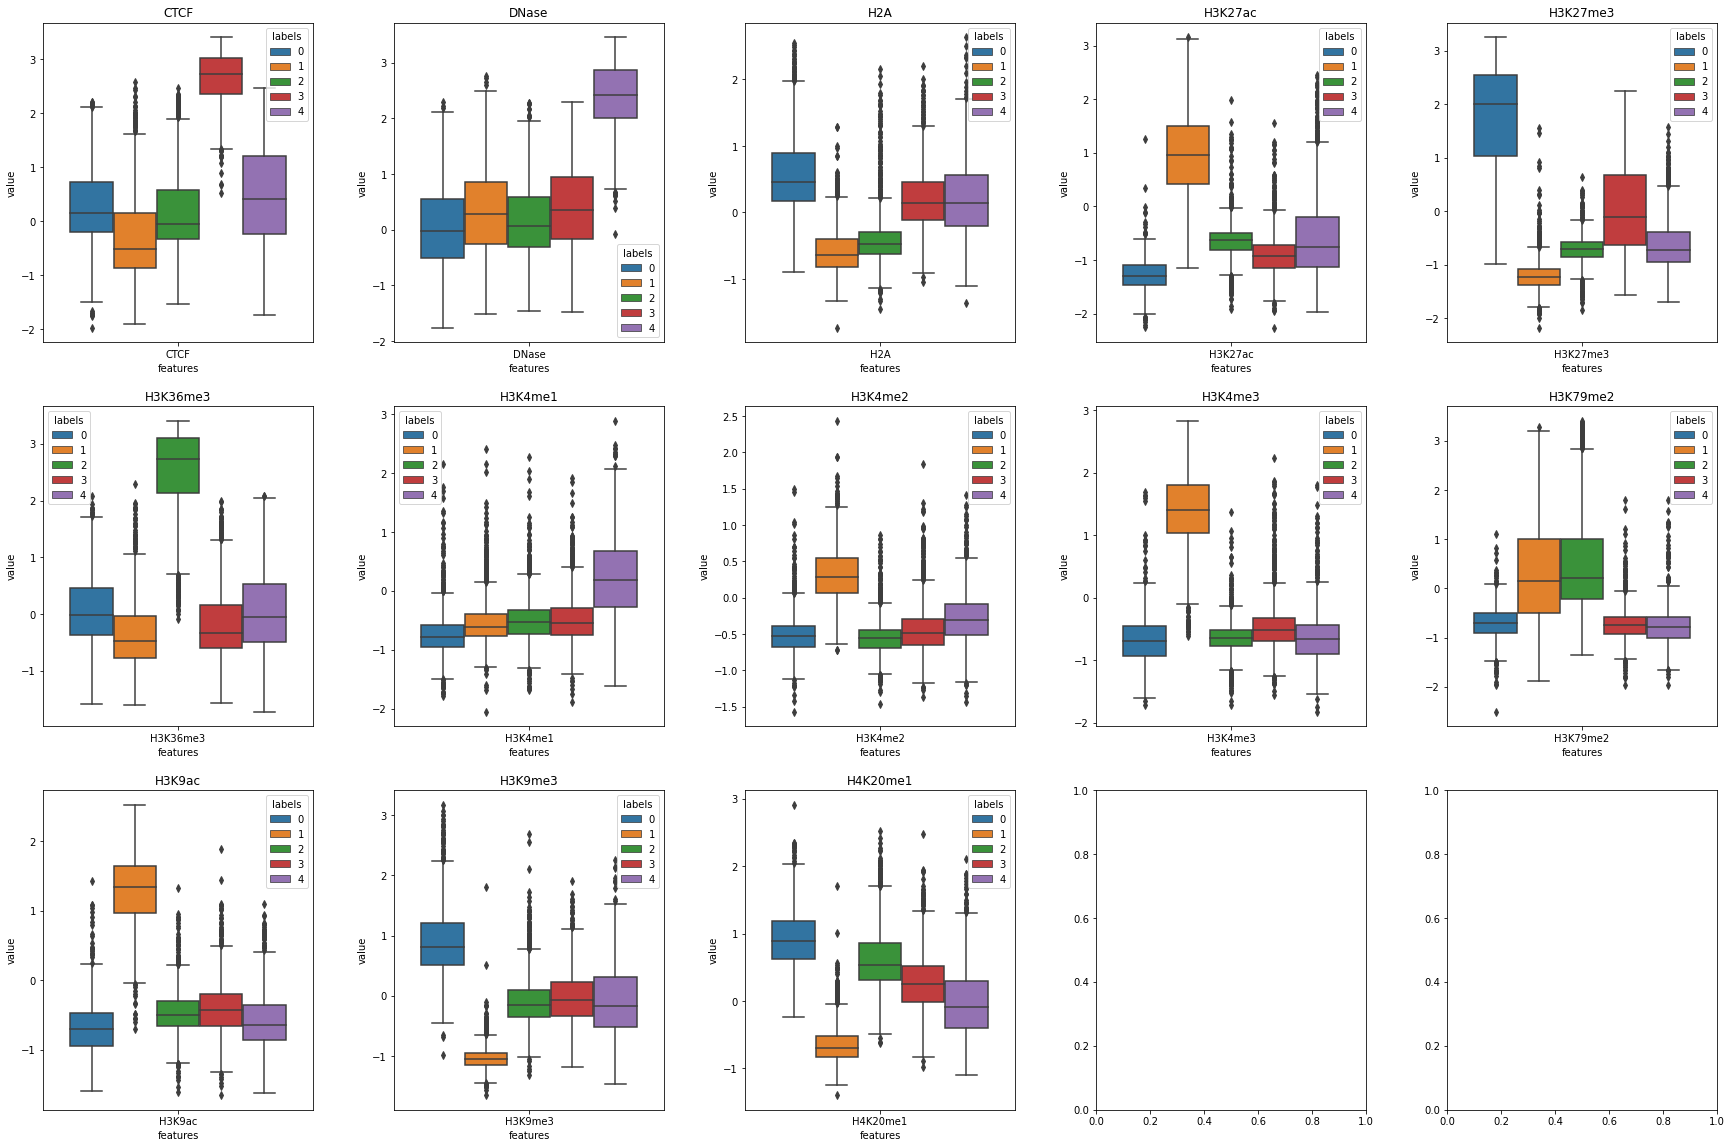

In [28]:
f, axes = plt.subplots(3, 5, figsize=(30, 20), sharex=False) 
f.subplots_adjust(hspace=0.2, wspace=0.3) 
for i in range(0,len(list(labeled))-1): 
    col = ['CTCF','DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1']
    if i < 5:
        ax = sns.boxplot(x='features', y='value', data=dat[dat['features'] == col[i]],hue='labels',ax=axes[0,(i)])
        ax.set_title(col[i])
    elif i >= 5 and i<10:
        ax = sns.boxplot(x='features', y='value', data=dat[dat['features'] == col[i]],hue='labels',ax=axes[1,(i-5)]) 
        ax.set_title(col[i])
    elif i >= 10:
        ax = sns.boxplot(x='features', y='value', data=dat[dat['features'] == col[i]],hue='labels',ax=axes[2,(i-10)])
        ax.set_title(col[i])

In [29]:
avg = []
for i in range(0, ncluster):
    avg.append(file_labeled[file_labeled['labels']==i].iloc[:,0:-2].mean(axis=0).to_dict())

avg_df = pd.DataFrame(avg) 
avg_df

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,121.409829,106.894205,124.207155,57.841235,183.776997,104.086853,76.410151,85.132681,81.624369,77.815782,81.245191,137.645177,140.567057
1,250.477642,383.460192,192.620069,530.931522,94.782029,235.740240,224.748410,364.829273,553.654770,388.103564,554.771124,123.311761,191.810802
2,143.411227,144.143720,94.885869,90.047277,77.225838,317.905907,98.645769,92.819688,88.236623,197.203931,99.321776,117.800318,175.909072
3,338.764781,173.248059,149.806543,89.575967,146.168066,127.875192,112.691351,115.579636,117.692654,93.866063,120.806543,134.313957,156.218313
4,180.928736,331.736307,144.434989,135.590545,95.479651,138.276863,171.885403,130.810458,111.110664,96.582789,112.257691,124.655054,130.561863


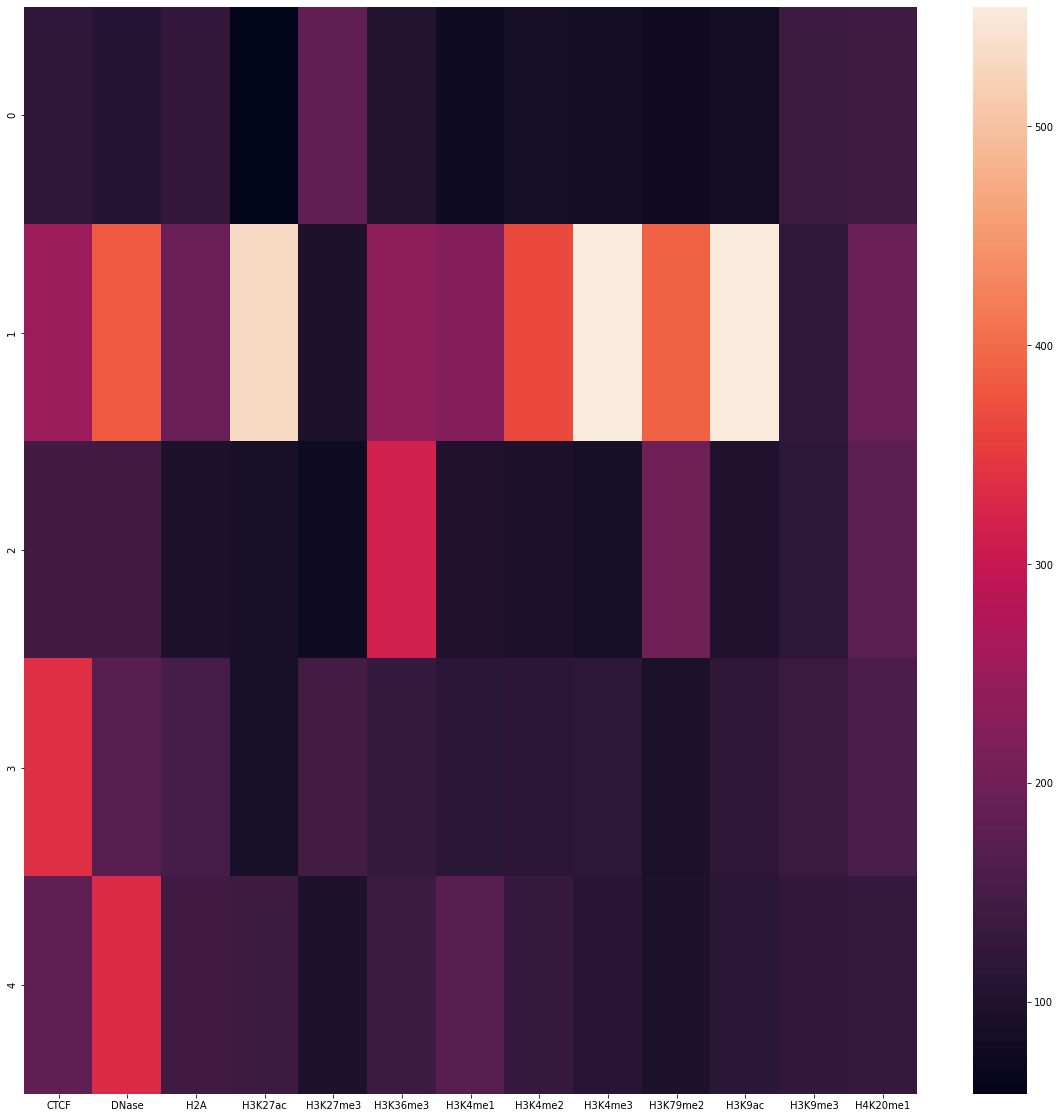

In [30]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(avg_df)

In [31]:
avgz = []
for i in range(0, ncluster):
    avgz.append(labeled[labeled['labels']==i].iloc[:,0:-1].mean(axis=0).to_dict())

avgz_df = pd.DataFrame(avgz) 
avgz_df

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,0.304951,0.052513,0.595332,-1.284687,1.728692,0.084606,-0.733260,-0.507567,-0.676423,-0.705451,-0.680287,0.904192,0.917389
1,-0.283278,0.357566,-0.578040,0.957484,-1.207875,-0.345451,-0.521652,0.320722,1.392255,0.314102,1.264308,-1.029491,-0.640652
2,0.188665,0.174234,-0.400169,-0.655737,-0.724080,2.516900,-0.495590,-0.544247,-0.638295,0.506271,-0.464403,-0.084527,0.620977
3,2.655865,0.405272,0.194653,-0.900795,0.053614,-0.149557,-0.474324,-0.426253,-0.456333,-0.737151,-0.404528,-0.030133,0.269671
4,0.520541,2.375982,0.222355,-0.533314,-0.620366,0.067031,0.242874,-0.267380,-0.606432,-0.755400,-0.573009,-0.064873,-0.008009


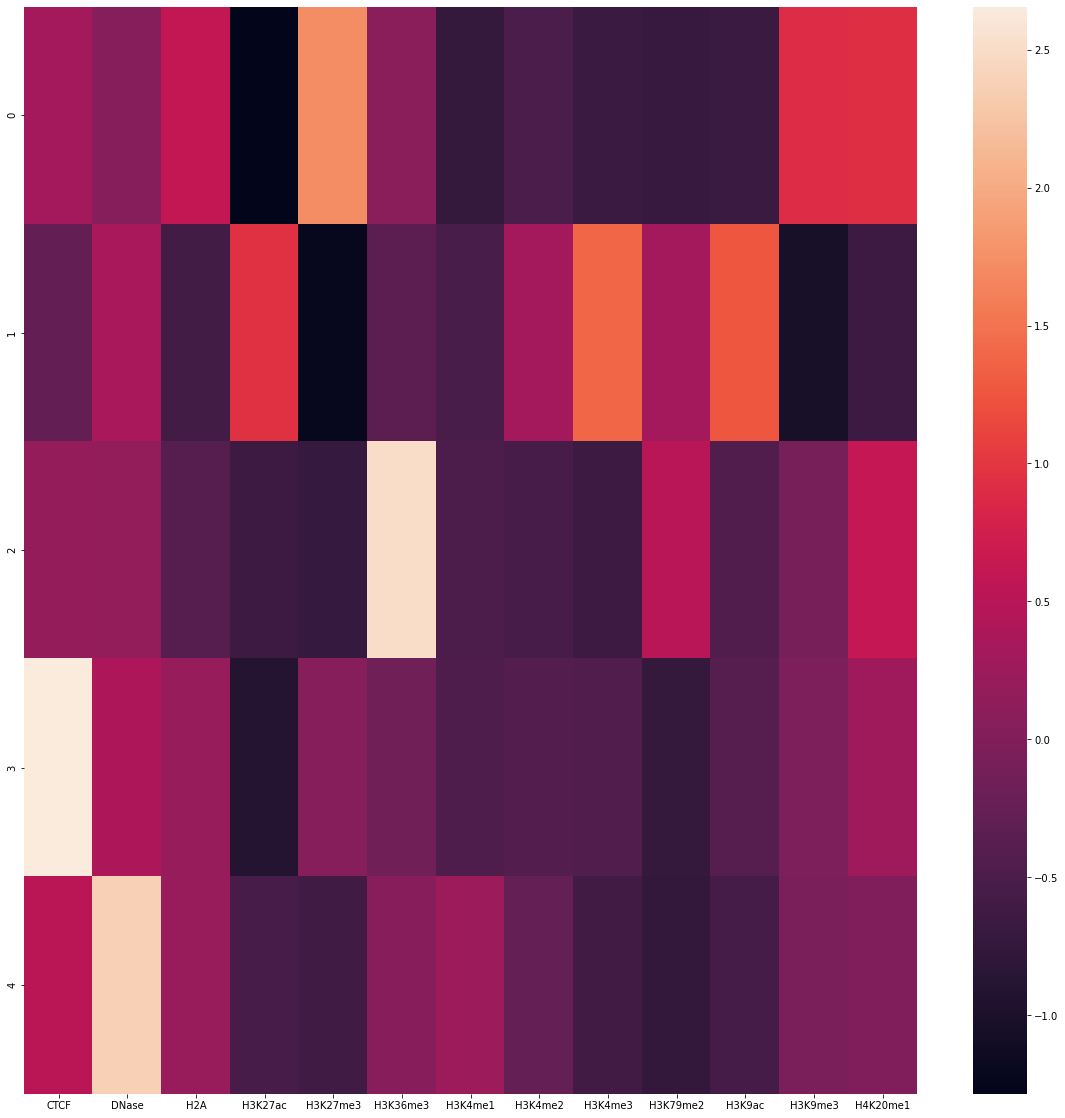

In [32]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(avgz_df)

In [57]:
av_row = pd.concat((normalized_features.mean(axis=1),labels),axis=1)
av_row.columns = ['avg', 'labels']
av_row

,avg,labels
0,2.732857e-16,1
1,-5.124106e-17,1
2,-2.092343e-16,1
3,2.092343e-16,1
4,3.416071e-17,1
...,...,...
6957,1.281027e-16,4
6958,8.113168e-17,2
6959,-2.860959e-16,3
6960,4.761149e-16,1


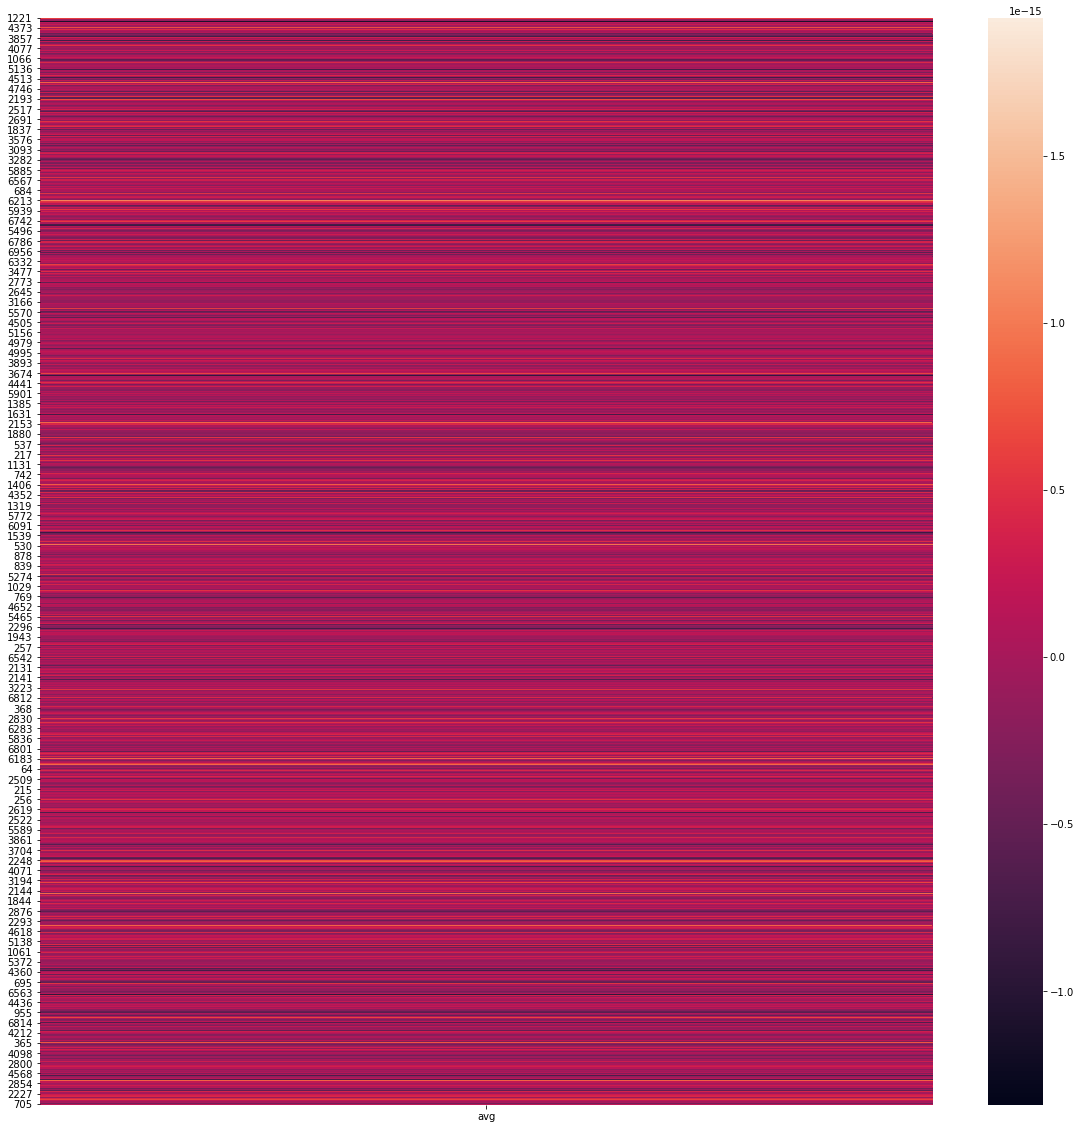

In [58]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(av_row.sort_values('labels').iloc[:,0:-1])

In [ ]:
ori = pd.melt(file_labeled,id_vars=['labels'],value_vars=['CTCF','DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'],var_name='features')
fig, ax = plt.subplots(figsize=(100,20)) 
sns.boxplot(x='features', y='value', data=ori,hue='labels')

In [ ]:
sns.pairplot(labeled,hue='labels')

In [ ]:
labeled['Constant'] = "Data"

In [ ]:
f, axes = plt.subplots(4, 4, figsize=(20, 25), sharex=False) 
f.subplots_adjust(hspace=0.2, wspace=0.7) 
for i in range(0,len(list(labeled))-2): 
    col = labeled.columns[i]
    if i < 4:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 4 and i<8:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[1,(i-4)]) 
        ax.set_title(col)
    elif i >= 8 and i<12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[2,(i-8)])
        ax.set_title(col)
    elif i >= 12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[3,(i-12)])
        ax.set_title(col)